# PROJET ML — CLASSIFICATION DE VIDÉOS YOUTUBE *TRENDING*

**Dataset Kaggle**: https://www.kaggle.com/datasets/datasnaek/youtube-new

**Objectif**: Développer un classificateur pour prédire si une vidéo YouTube deviendra *trending*.

> Ce notebook est conçu pour être complété. Chaque section contient des consignes détaillées et des zones de code à compléter.


## 1. Importation des librairies

**Consigne 1.1 — Importez toutes les librairies nécessaires**
- `pandas`, `numpy` pour la manipulation de données  
- `matplotlib.pyplot`, `seaborn` pour la visualisation  
- `sklearn` pour le machine learning  
- `warnings` pour supprimer les avertissements

In [71]:
# VOTRE CODE ICI - Section 1.1
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et exploration des données

**Consigne 2.1 — Chargement des données**
- Chargez le fichier `USvideos.csv` avec pandas  
- Affichez les 5 premières lignes  
- Affichez les informations générales (`info()`, `shape`, `describe()`)

*Aide* :
- Utilisez `pd.read_csv()` avec `encoding='utf-8'`
- `.info()` donne les types de colonnes et valeurs non-nulles
- `.describe()` donne les statistiques descriptives

In [72]:
# VOTRE CODE ICI - Section 2.1
# import pandas as pd
# df = pd.read_csv('USvideos.csv', encoding='utf-8')
# print("Premières lignes:")
# display(...())
# print("\nInformations générales:")
# display(...())
# print("Shape:", ....)
# display(df.describe(include='all').transpose())

df= pd.read_csv('USvideos.csv', encoding='utf-8')
print("Premières lignes:")
display(df.head(1))
print("\nInformations générales:")
# <class 'pandas.core.frame.DataFrame'> : - DataFrame → class (le plan fourni par pandas pour créer des tableaux)
#                                           DataFrame est la classe : elle définit toutes les méthodes possibles (head(), describe(), shape, info(), etc.).
#                                          - df → object (ton tableau concret créé avec ce plan)
#                                            df est un objet : tu peux l’utiliser, l’afficher, filtrer des lignes, calculer des moyennes…
display(df.info())
print("Shape:", df.shape)
# Le tableau contient 40949 lignes et 16 colonnes
display(df.describe(include='all').transpose())
# Avec include='all' on demande à pandas d’essayer d’inclure toutes les colonnes (numériques, texte/objets, dates, booléens, catégories) sinon seulement les colonnes numériques
# Avec .transpose(), chaque ligne correspond à une colonne du DataFrame et chaque colonne correspond à une métrique. C’est souvent plus lisible quand tu as beaucoup de colonnes.

Premières lignes:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...



Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949

None

Shape: (40949, 16)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_id,40949,6351,j4KvrAUjn6c,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trending_date,40949,205,17.14.11,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,40949,6455,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,40949,2207,ESPN,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,40949.0,NaN,NaN,NaN,19.972429,7.568327,1.0,17.0,24.0,25.0,43.0
publish_time,40949,6269,2018-05-18T14:00:04.000Z,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,40949,6055,[none],1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,40949.0,NaN,NaN,NaN,2360784.638257,7394113.759704,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,NaN,NaN,NaN,74266.702435,228885.338209,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,NaN,NaN,NaN,3711.400889,29029.705945,0.0,202.0,631.0,1938.0,1674420.0


**Consigne 2.2 — Analyse des valeurs manquantes**  
- Comptez les valeurs manquantes par colonne  
- Identifiez les colonnes avec le plus de valeurs manquantes  
- Affichez le pourcentage de valeurs manquantes

In [73]:
# VOTRE CODE ICI - Section 2.2
# #Valeurs manquantes
missing = df.isna().sum() #isna() est similaire à isnull() par contre isna() est la nouvelle convention pandas
#Valeurs manquantes en pourcentage = 1.39 % 
pct_missing = (missing / len(df)) * 100
print("Valeurs manquantes (nombre):")
display(missing)
print("\nValeurs manquantes (pourcentage):")
display(pct_missing)

Valeurs manquantes (nombre):


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


Valeurs manquantes (pourcentage):


video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

**Consigne 2.3 — Exploration des catégories**  
- Chargez le fichier JSON des catégories (`US_category_id.json`)  
- Fusionnez avec le DataFrame principal  
- Affichez la distribution des catégories

*Aide* : La structure JSON est du type:  
`{"items": [{"id": "1", "snippet": {"title": "Film & Animation"}}, ...]}`

In [74]:
# VOTRE CODE ICI - Section 2.3
import pandas as pd
import json
categories_raw = pd.read_json('US_category_id.json') # Transforme le fichier Json imbriqué en DataFrame
print(type(categories_raw['items'])) # type series Pandas (colonne d'un tableau avec son index): on peut utiliser certaine méthode : .mean(), .describe(), .isna()
items = categories_raw['items'].tolist() # Transforme une Series pandas (colonne avec index) en liste Python (juste les valeurs, plus simple).
print(type(items)) # liste Python = juste les valeurs, sans index, sans méthodes pandas avancées : Pas de .mean(), .describe(), .isna() sur une liste → tu dois tout programmer toi-même.
display(items)
category_dict = {int(item['id']): item['snippet']['title'] for item in items} # On transforme la clé item['id']string en int, ensuite on boucle afin d'extraire chaque valeur item['title'] et son ID
print(category_dict)
cat_df = pd.DataFrame(list(category_dict.items()), columns=['category_id', 'category_title'])

        # .items() → récupère toutes les paires clé/valeur d’un dictionnaire.
        # list(...) → transforme ça en une liste de tuples.
        # pd.DataFrame(...) → transforme cette liste en tableau (DataFrame).
        # columns=[...] → donne des noms clairs aux colonnes.
        # Donc au lieu d’avoir un dictionnaire, on a un tableau pandas prêt pour l’analyse de données.
"""
dict = parfait pour accéder rapidement à une valeur avec une clé.
DataFrame = parfait pour analyser, trier, fusionner avec d’autres données.
Un DataFrame pandas est comme une table Excel :tu peux trier,filtrer,fusionner avec d’autres données,sauvegarder facilement en CSV, JSON, SQL, etc.
category_dict = version “Python pure” (rapide, simple)
cat_df = version “pandas” (prête pour l’analyse et la manipulation tabulaire)
On fait ça car pandas travaille avec des DataFrames."""

df_merged = df.merge(       # Prends df, on lui ajoute les colonnes de cat_df en utilisant la correspondance entre les category_id.
    cat_df,                 # le tableau avec lequel on fusionne
    how='left',             # type de jointure
    left_on='category_id',  # table de gauche
    right_on='category_id'  # table de droite
    )

print("Distribution des catégories:")
display(df_merged['category_title'] # on veut un tableau qui te dit combien de vidéos par catégorie
        .value_counts()             # fait un dénombrement des valeurs uniques sur category_title.
        .to_frame('count')          # transforme le résultat en DataFrame avec une colonne nommée "count".
        )


<class 'pandas.core.series.Series'>
<class 'list'>


[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHe

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}
Distribution des catégories:


,count
category_title,
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174


## 3. Nettoyage des données

**Consigne 3.1 — Nettoyage des données**
- Supprimez les doublons basés sur `video_id`  
- Gérez les valeurs manquantes dans `description` (remplacez par string vide)  
- Convertissez `publish_time` en datetime  
- Supprimez les lignes avec des valeurs aberrantes (ex: `views` négatives)

In [75]:
# VOTRE CODE ICI - Section 3.1
df_clean = df_merged.drop_duplicates(subset='video_id').copy() # Supprimez les doublons basés sur `video_id` 
df_clean['description'] = df_clean['description'].fillna('') # Remplacer les valeurs manquantes de la colonne description par une string vide

""" Actuellement le format actuelle sur df_clean est sous forme : 2017-11-13T17:13:01.000Z, c'est le format format ISO 8601. 
    Pandas le considère comme un objet. 
    Pour faire des calculs sur les dates (trier, filtrer, extraire l’année, le mois…), il faut la convertir en datetime.
"""
print(df_clean['publish_time'].dtype)

# Convertissez `publish_time` en datetime  
df_clean['publish_time'] =  pd.to_datetime(df_clean['publish_time'], errors='coerce') 
"""
errors='coerce' est très utile pour : 
- Nettoyer des colonnes numériques avec des chaînes “sales”. 
- Transformer des dates mal formatées en datetime  Ex: ["2023-01-01", "invalide", "2023-03-15"] -> 2023-01-01 NaT(Not a Time) 2023-03-15.
- Eviter que pandas bloque avec une erreur.

"""
df_clean = df_clean.dropna(subset=['publish_time']) # sert à supprimmer les lignes où publish_time est manquant (NaT après conversion en datetime).

# Supprimez les lignes avec des valeurs aberrantes (ex: `views` négatives)
df_clean = df_clean[(df_clean['views'] >= 0) & (df_clean['likes'] >= 0) & (df_clean['dislikes'] >= 0) & (df_clean['comment_count'] >= 0)]
print((df_clean.select_dtypes(include='number') < 0).sum()) #On vérifie dans les colonnes de type number s'il y'a des valeurs négatifs



object
category_id      0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64


## 4. Feature Engineering

Le Feature Engineering (ou création de variables) est l’art de transformer et enrichir les données brutes pour que les modèles de Machine Learning puissent mieux apprendre.

Pourquoi c’est important ?
- Les modèles ne comprennent que les nombres. Ils ne savent pas deviner des relations ou des patterns complexes dans des colonnes brutes (ex : des   
  dates, des textes ou des catégories).

- De bonnes features améliorent la performance du modèle.

- De mauvaises features peuvent faire baisser la précision ou même tromper le modèle.

**Consigne 4.1 — Variables d'engagement**
** définition : https://support.google.com/youtube/answer/2991785?hl=fr**

In [76]:
# VOTRE CODE ICI - Section 4.1
import numpy as np
eps = 1e-9       # eps = 0.000000001 est une valeur très petite pour éviter la division par zéro. Ex: si views = 0, Python plante avec ZeroDivisionError.

# Nombre total de réactions (likes + dislikes).
denom = df_clean['likes'] + df_clean['dislikes'] 

# Ratio de "like" par rapport aux interactions
df_clean['like_ratio'] = np.where(denom > 0, df_clean['likes'] / denom, 0)
"""
    np.where(condition, valeur_si_vrai, valeur_si_faux) → équivalent d’un if vectorisé :
    Si denom > 0 → calculer likes / denom
    Sinon → mettre 0 (aucune interaction)

"""
# Taux d’engagement global
df_clean['engagement_rate'] = np.where(df_clean['views'] > 0,
                                      (df_clean['likes'] + df_clean['dislikes'] + df_clean['comment_count']) / (df_clean['views'] + eps),
                                       0)
"""
    Avec la condition views > 0, eps n’est pas strictement nécessaire.
    eps est là pour prévenir toute division par zéro accidentelle, notamment dans des calculs plus complexes ou sur des colonnes float,
    il peut y avoir des vues très proches de zéro ou des flottants arrondis à zéro (0.0).

"""
# Commentaires par vue
df_clean['comments_per_view'] = np.where(df_clean['views'] > 0, df_clean['comment_count'] / (df_clean['views'] + eps), 0)

display(df_clean)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,like_ratio,engagement_rate,comments_per_view
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.950970,0.102151,0.021318
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,0.940521,0.047972,0.005252
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,0.964729,0.049994,0.002563
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,0.938550,0.037836,0.006253
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,0.985181,0.072405,0.008359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,18.14.06,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,26,2018-06-12 18:55:26+00:00,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,https://i.ytimg.com/vi/dS5Thrl-4Kc/default.jpg,False,False,False,"Hey Larlees, todays video is me testing Crayol...",Howto & Style,0.966927,0.050341,0.005790
40761,JGm9Y_hFqNk,18.14.06,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13 15:06:08+00:00,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,https://i.ytimg.com/vi/JGm9Y_hFqNk/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...,Sports,0.960105,0.012950,0.003082
40762,6h8QgZF5Qu4,18.14.06,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,24,2018-06-13 05:27:27+00:00,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,https://i.ytimg.com/vi/6h8QgZF5Qu4/default.jpg,False,False,False,James Corden and Ashton Kutcher square off in ...,Entertainment,0.979230,0.023472,0.001243
40764,mpnshdmtE2Y,18.14.06,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,26,2018-06-12 16:03:58+00:00,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",540149,14206,693,1211,https://i.ytimg.com/vi/mpnshdmtE2Y/default.jpg,False,False,False,"Ground chuck is a great all-purpose, buy-it-an...",Howto & Style,0.953487,0.029825,0.002242


### Visualiser les top N vidéos par métrique


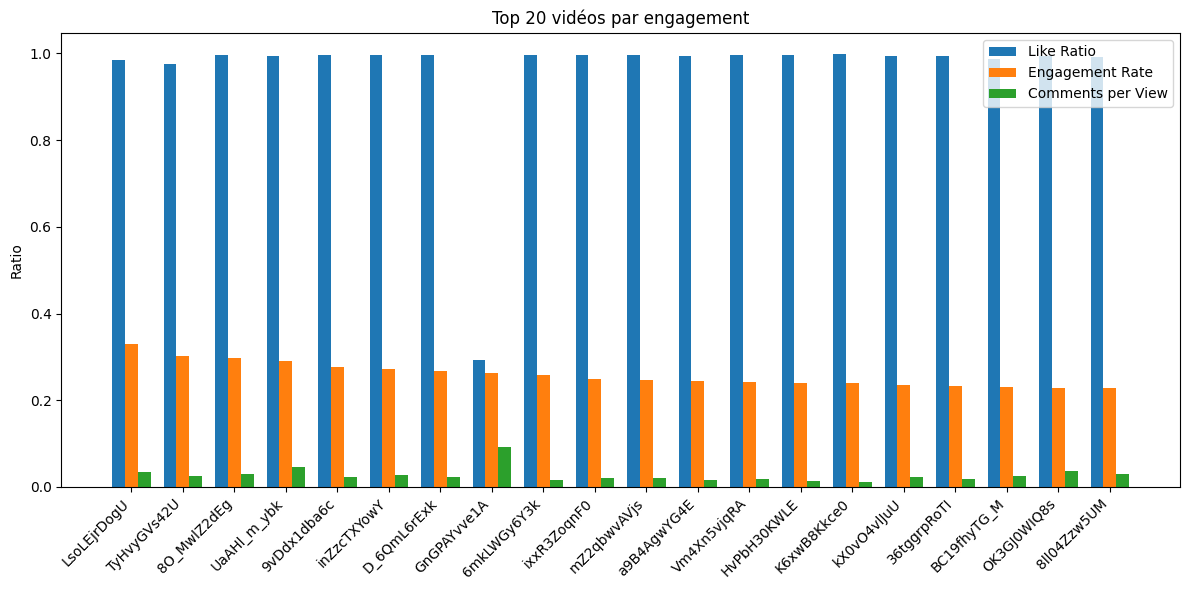

In [77]:

# Trier par engagement_rate et garder les 20 meilleures
top_videos = df_clean.sort_values('engagement_rate', ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12,6))
x = np.arange(len(top_videos['video_id']))
width = 0.25

plt.bar(x - width, top_videos['like_ratio'], width, label='Like Ratio')
plt.bar(x, top_videos['engagement_rate'], width, label='Engagement Rate')
plt.bar(x + width, top_videos['comments_per_view'], width, label='Comments per View')

plt.xticks(x, top_videos['video_id'], rotation=45, ha='right')
plt.ylabel('Ratio')
plt.title('Top 20 vidéos par engagement')
plt.legend()
plt.tight_layout()
plt.show()


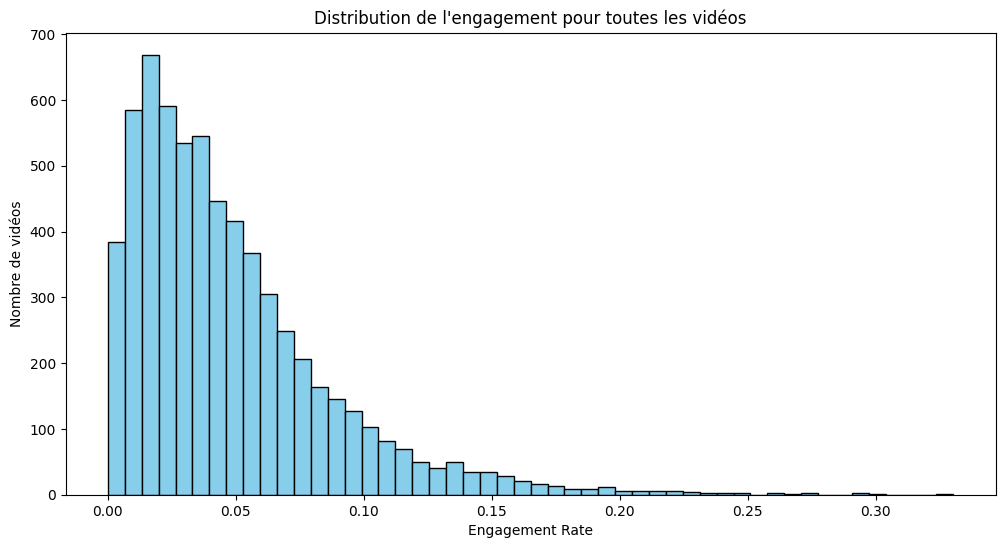

In [78]:
# Distribution générale avec histogrammes pour voir toutes les vidéos
plt.figure(figsize=(12,6))
plt.hist(df_clean['engagement_rate'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Engagement Rate')
plt.ylabel('Nombre de vidéos')
plt.title('Distribution de l\'engagement pour toutes les vidéos')
plt.show()


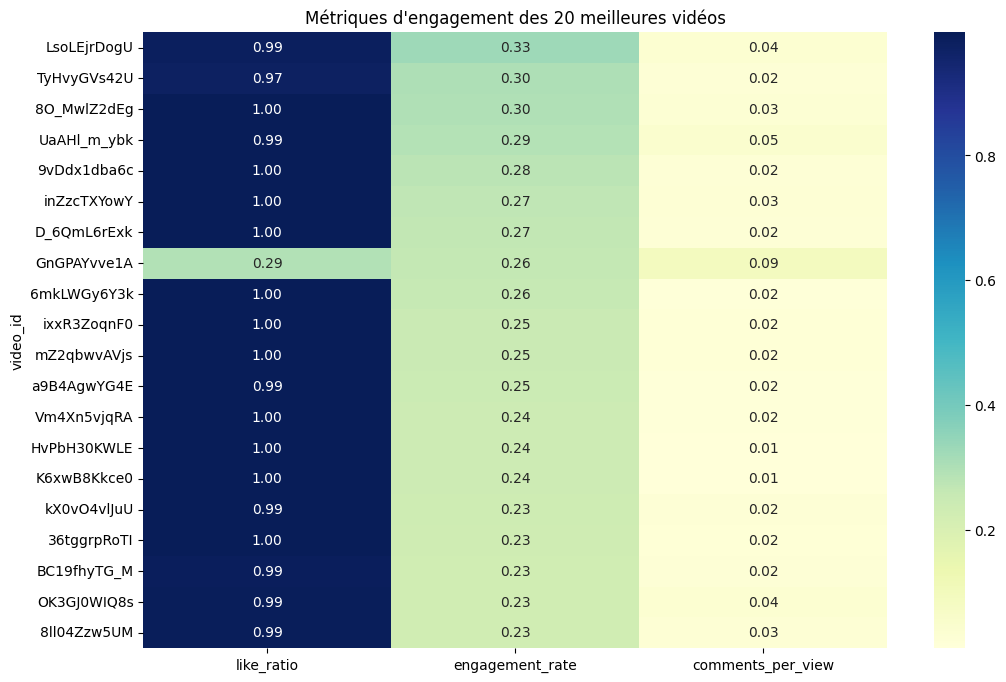

In [79]:
# Top 20 heatmap : on compare toutes les métriques ensemble pour les meilleures vidéos :

top_videos_metrics = top_videos[['video_id', 'like_ratio', 'engagement_rate', 'comments_per_view']]
top_videos_metrics = top_videos_metrics.set_index('video_id')

plt.figure(figsize=(12,8))
sb.heatmap(top_videos_metrics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Métriques d\'engagement des 20 meilleures vidéos')
plt.show()


**Consigne 4.2 — Variables temporelles** : 

Elles permettent de :

Analyser la saisonnalité :
Quels mois ou jours génèrent le plus d’engagement ?

Analyser les tendances :
L’engagement augmente-t-il avec le temps ?
Extraire des parties du temps pour mieux comprendre le comportement des utilisateurs :Heure de publication, jour de la semaine, mois, trimestre, année,etc.

In [125]:
# VOTRE CODE ICI - Section 4.2
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])

"""
L’idée, c’est de rendre l’information plus exploitable pour l’analyse et la modélisation.
1. Faciliter les regroupements et visualisations

Si tu veux savoir quel jour de la semaine les vidéos sont le plus souvent publiées :
  Tu ne peux pas directement grouper sur une colonne publish_time (trop granulaire, chaque date est unique).
  Mais si tu crées publish_day_of_week, tu peux faire un simple groupby et un barplot. 

Les algorithmes de ML ne savent pas deviner tout seuls que dans une date il y a une saisonnalité, des jours de la semaine, etc.
On décompose publish_time en features pour donner ces indices au modèle.

publish_hour → capter si les vidéos publiées le soir performent mieux.
publish_day_of_week → voir si les vidéos de tel jour attirent plus.
publish_month → analyser la saisonnalité.
"""

df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])
print((df_clean['publish_month'] == 7).sum())

,publish_day_of_week,publish_time
0,0,2017-11-13 17:13:01+00:00
1,0,2017-11-13 07:30:00+00:00
2,6,2017-11-12 19:05:24+00:00
3,0,2017-11-13 11:00:04+00:00
4,6,2017-11-12 18:01:41+00:00
...,...,...
40760,1,2018-06-12 18:55:26+00:00
40761,2,2018-06-13 15:06:08+00:00
40762,2,2018-06-13 05:27:27+00:00
40764,1,2018-06-12 16:03:58+00:00


,publish_day_of_week,publish_time
0,0,2017-11-13 17:13:01+00:00
1,0,2017-11-13 07:30:00+00:00
2,6,2017-11-12 19:05:24+00:00
3,0,2017-11-13 11:00:04+00:00
4,6,2017-11-12 18:01:41+00:00
...,...,...
40760,1,2018-06-12 18:55:26+00:00
40761,2,2018-06-13 15:06:08+00:00
40762,2,2018-06-13 05:27:27+00:00
40764,1,2018-06-12 16:03:58+00:00


4


### Visualisation en rapport avec le temps

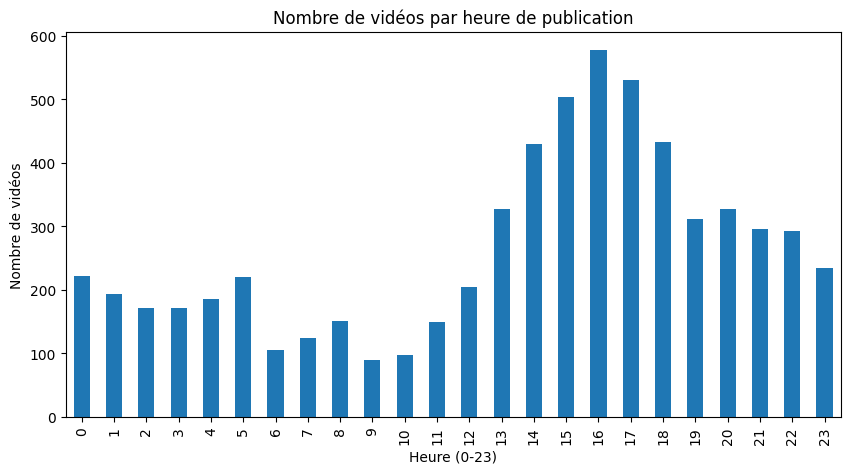

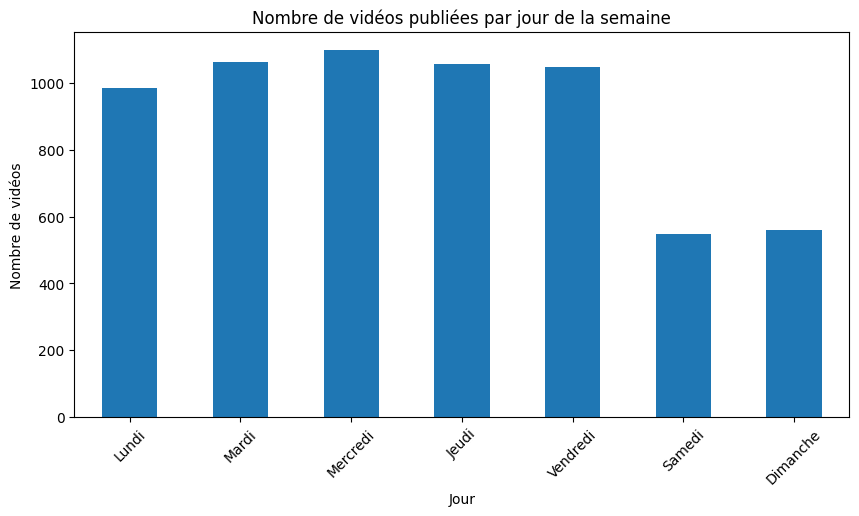

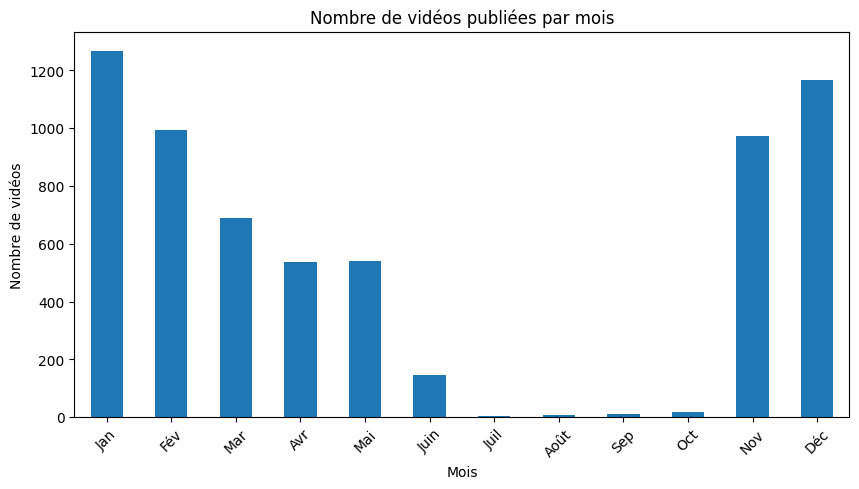

In [116]:
import matplotlib.pyplot as plt

# Histogramme : Nombre de vidéos par heure
plt.figure(figsize=(10,5))
df_clean['publish_hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vidéos par heure de publication")
plt.xlabel("Heure (0-23)")
plt.ylabel("Nombre de vidéos")
plt.show()

# Histogramme : Nombre de vidéos par jour de la semaine
jours = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']
plt.figure(figsize=(10,5))
df_clean['publish_day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vidéos publiées par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre de vidéos")
plt.xticks(range(7), jours, rotation=45)
plt.show()

mois = ['Jan','Fév','Mar','Avr','Mai','Juin','Juil','Août','Sep','Oct','Nov','Déc']

# Comptage par mois, avec reindex pour inclure tous les mois 1 à 12
counts = df_clean['publish_month'].value_counts().sort_index().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title("Nombre de vidéos publiées par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de vidéos")
plt.xticks(range(12), mois, rotation=45)
plt.show()


**Consigne 4.3 — Variables textuelles (titre)**

In [81]:
# VOTRE CODE ICI - Section 4.3
# df_clean['title_length'] = ...
# df_clean['title_word_count'] = ....
# df_clean['has_caps'] = ...
# df_clean['has_numbers'] = ...

## 5. Création de la variable cible

**Consigne 5.1 — Définition de `is_trending`**  
- Une vidéo est *trending* si elle a plus de vues que le 80e percentile de sa catégorie

In [82]:
# VOTRE CODE ICI - Section 5.1
# df_clean['is_trending'] = (df_clean.groupby('category_id')['views']
#                                   .transform(lambda x: x > x.quantile(0.8))).astype(int)
# print("Distribution de la variable cible:")
# display(df_clean['is_trending'].value_counts().to_frame('count'))

## 6. Préparation des données pour l'entraînement

**Consignes 6.1 & 6.2 — Sélection des features & split train/test**

In [83]:
# VOTRE CODE ICI - Section 6.1 et 6.2
# features = ['views', 'likes', 'dislikes', 'comment_count',
#             'like_ratio', 'engagement_rate', 'title_length', 'publish_hour', 'category_id']
# X = df_clean[features].copy()
# y = df_clean['is_trending'].copy()
#.......
# ......

# print(f"Taille train: {X_train.shape}")
# print(f"Taille test: {X_test.shape}")

**Consigne 6.3 — Normalisation des données (StandardScaler)**

In [84]:
# VOTRE CODE ICI - Section 6.3
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# num_cols = ['views', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'engagement_rate', 'title_length', 'publish_hour']
# # Fit uniquement sur train
# ....
# ...
# ....
# ....
# ....

## 7. Modèle 1 — Random Forest

**Consigne 7.1 — Entraînement**

In [85]:
# VOTRE CODE ICI - Section 7.1
# from sklearn.ensemble import RandomForestClassifier
# ....
# ....
# ....

**Consigne 7.2 — Évaluation**

In [86]:
# VOTRE CODE ICI - Section 7.2
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# print("Random Forest - Résultats:")
# print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
# print(f"Precision: {precision_score(y_test, rf_predictions):.4f}")
# print(f"Recall: {recall_score(y_test, rf_predictions):.4f}")
# print(f"F1-Score: {f1_score(y_test, rf_predictions):.4f}")
# # Importance des variables
# import pandas as pd
# feature_importance = pd.DataFrame({
#     'feature': X.columns,
#     'importance': rf_model.feature_importances_
# }).sort_values('importance', ascending=False)
# print("\nTop 10 variables importantes:")
# display(feature_importance.head(10))

## 8. Modèle 2 — Support Vector Machine (SVM)

**Consigne 8.1 — Entraînement (utiliser données normalisées)**

In [87]:
# VOTRE CODE ICI - Section 8.1
# from sklearn.svm import SVC
# ...
# ...
# ...

**Consigne 8.2 — Évaluation**

In [88]:
# VOTRE CODE ICI - Section 8.2
# print("SVM - Résultats:")
# print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
#....
# ...
# ...

## 9. Modèle 3 — Gradient Boosting (XGBoost)

**Consigne 9.1 — Entraînement**

In [89]:
# VOTRE CODE ICI - Section 9.1
# try:
#     from xgboost import XGBClassifier
#     xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42, n_jobs=-1, eval_metric='logloss')
#     xgb_model.fit(X_train, y_train)
#     xgb_predictions = xgb_model.predict(X_test)
# except ImportError:
#     print("XGBoost n'est pas installé. Installez avec: pip install xgboost")
#     xgb_model = None
#     xgb_predictions = None

**Consigne 9.2 — Évaluation**

In [90]:
# VOTRE CODE ICI - Section 9.2
# if xgb_predictions is not None:
#     print("XGBoost - Résultats:")
#     print(f"Accuracy: {accuracy_score(y_test, xgb_predictions):.4f}")
#     print(f"Precision: {precision_score(y_test, xgb_predictions):.4f}")
#     print(f"Recall: {recall_score(y_test, xgb_predictions):.4f}")
#     print(f"F1-Score: {f1_score(y_test, xgb_predictions):.4f}")

## 10. Modèle 4 — Réseau de Neurones (MLPClassifier)

**Consigne 10.1 — Entraînement (données normalisées)**

In [91]:
# VOTRE CODE ICI - Section 10.1
# from sklearn.neural_network import MLPClassifier
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
# nn_model.fit(X_train_scaled, y_train)
# nn_predictions = nn_model.predict(X_test_scaled)

**Consigne 10.2 — Évaluation**

In [92]:
# VOTRE CODE ICI - Section 10.2
# print("Réseau de Neurones - Résultats:")
# ....
# print(f"Precision: {precision_score(y_test, nn_predictions):.4f}")
# print(f"Recall: {recall_score(y_test, nn_predictions):.4f}")
# print(f"F1-Score: {f1_score(y_test, nn_predictions):.4f}")
# # Nombre d'itérations
# # ....

## 11. Comparaison des modèles

In [93]:
# VOTRE CODE ICI - Section 11.1
# import pandas as pd
# results = []
# # Remplir en fonction des métriques calculées plus haut
# # results.append({'Model': 'Random Forest', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # results.append({'Model': 'SVM', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # if xgb_predictions is not None: results.append({'Model': 'XGBoost', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # results.append({'Model': 'Neural Network', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# results_df = pd.DataFrame(results)
# display(results_df)
# # Graphique comparatif des F1-scores (optionnel)
# # import matplotlib.pyplot as plt
# # plt.figure()
# # plt.bar(results_df['Model'], results_df['F1-Score'])
# # plt.title('Comparaison des F1-scores')
# # plt.ylabel('F1-Score')
# # plt.show()

## 12. Validation croisée

In [94]:
# VOTRE CODE ICI - Section 12.1
# from sklearn.model_selection import cross_val_score
# # Exemple avec Random Forest (remplacez par votre meilleur modèle)
# # scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# # print(f"Validation croisée - F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

## 13. Optimisation des hyperparamètres (Grid Search)

In [95]:
# VOTRE CODE ICI - Section 13.1
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10]
# }
# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     cv=3,
#     scoring='f1',
#     n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# print("Meilleurs paramètres:", grid_search.best_params_)
# print("Meilleur score CV:", grid_search.best_score_)
# best_rf = grid_search.best_estimator_
# best_rf_pred = best_rf.predict(X_test)

## 14. Analyse des erreurs

In [96]:
# VOTRE CODE ICI - Section 14.1
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# # Exemple: matrice de confusion pour le meilleur modèle (remplacez best_rf_pred)
# # cm = confusion_matrix(y_test, best_rf_pred)
# # plt.figure(figsize=(8, 6))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
# #             xticklabels=['Non-Trending', 'Trending'],
# #             yticklabels=['Non-Trending', 'Trending'])
# # plt.title('Matrice de Confusion - Meilleur Modèle')
# # plt.ylabel('Valeurs Réelles')
# # plt.xlabel('Prédictions')
# # plt.show()

In [97]:
# VOTRE CODE ICI - Section 14.2
# # Identifier des exemples mal classifiés (adapter selon le modèle choisi)
# # errors_mask = (y_test != best_rf_pred)
# # error_indices = X_test[errors_mask].index
# # print("Exemples de vidéos mal classifiées:")
# # for idx in list(error_indices)[:5]:
# #     real_label = y_test.loc[idx]
# #     predicted_label = best_rf_pred[list(error_indices).index(idx)]  # à adapter si nécessaire
# #     print(f"Index {idx}: Réel={real_label}, Prédit={predicted_label}")

## 15. Sauvegarde & conclusions

In [98]:
# VOTRE CODE ICI - Section 15.1
# import joblib
# # Remplacez 'best_rf' / 'scaler' par vos objets
# # joblib.dump(best_model, 'best_youtube_classifier.pkl')
# # joblib.dump(scaler, 'feature_scaler.pkl')
# # print("Modèle et scaler sauvegardés avec succès!")

### Conclusions à rédiger

1. **Meilleur modèle**  
   - Modèle: *[À compléter]*  
   - Performances: *[À compléter]*  
   - Raisons: *[À compléter]*

2. **Variables les plus importantes**  
   - *[À compléter]*

3. **Limitations**  
   - *[À compléter]*

4. **Améliorations suggérées**  
   - *[À compléter]*

5. **Apprentissages**  
   - *[À compléter]*

---
## Guide de testing pour les étudiants

**Comment tester vos implémentations :**
1. **Vérifications de base** : `.shape`, `.info()`, `.head()`  
2. **Validation des features** : pas de NaN, ratios entre 0 et 1, plages temporelles correctes  
3. **Validation des modèles** : prédictions binaires {0,1}, longueurs cohérentes, comparaisons rigoureuses  
4. **Tests de cohérence** : scores réalistes, F1 entre précision et rappel, impact de la normalisation  
5. **Debugging** : augmenter `max_iter` si nécessaire, vérifier entrées/sorties et dimensions